# Rapport TP1 Optimisation et Apprentissage

Le but de ce TP est d’implémenter quelques algorithmes de recherche stochastiques et
surtout d’en étudier le comportement empirique sur quelques fonctions tests.

Les algorithmes donnés ont pour but de minimiser le résultats de ces fonctions.<br>
Nous allons d'abord regarder quelle est la valeur minimale de chaque fonction et pour quelle valeur elle est atteinte.

### Fonction n°1

In [1]:
import numpy as np

In [2]:
def f1(x):
    X = np.array(x)
    return np.sum(X**2)

On voit que pour f1, il s'agit de faire la somme des $x_i^2$. <br>
Comme chaque $x_i$ est au carré, on ne peut pas avoir de valeur négative. <br>
On cherche, par conséquent, $\sum_{i=1}^{n} x_{i}^{2} = 0$, ce qui est obtenu lorsque $x_{i} = 0$ pour tous les $x_i$.

Lorsque l'on prend x de taille 2, on obtient :
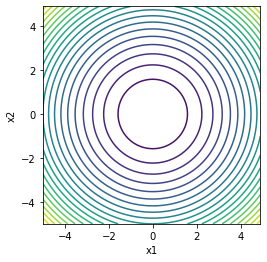

### Fonction n°2

In [3]:
def f2(x):
    X = np.array(x)
    n = len(X)
    res = 0
    for i in range(1,n+1):
        res += (100**((i-1)/(n-1))*X[i-1])**2
    return res

f2 se comporte de la même manière que f1 car il s'agit de la même fonction à un facteur positif près. <br>
$100^{\frac {i-1}{n-1}}$ vient donc pondérer les différents $x_i$, les derniers $x_i$ auront donc plus de poid que les premiers.

C'est x2 qui détermine la minimisation (facteur 100) : <br>
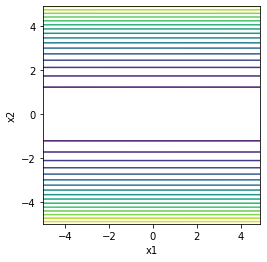 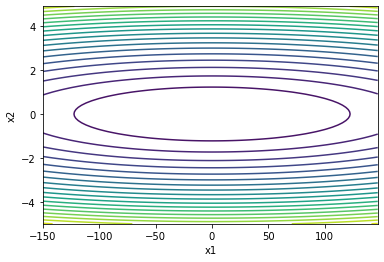

### Fonction n°3

In [4]:
def f3(x):
    X = np.array(x)
    n = len(X)
    res = 10*n
    for x in X:
        res += x**2 - 10*np.cos(2*np.pi*x) 
    return res

f3 se base toujours dur des $x_i^2$ mais on vient y soustraire un élément : $10$ x $\cos(2$ x $\pi$ x $x_{i})$. <br>
$\cos(2$ x $\pi$ x $x_{i}$ est une fonction périodique qui oscille entre 0 et 1. <br>
On minimise $x_i^2$ pour $x_i$ = 0, ce qui donnera $10$ x $\cos(2$ x $\pi$ x $0) = 10$ x $\cos(0) = 10$<br>
Et comme $\cos(2$ x $\pi$ x $x_{i}$ oscille entre 0 et 1, on obtient la valeur maximale de cette partie. <br>
En soustrayant cette partie, on obtient alors la valeur minimale de la somme : $-10$ x $n$. <br>
Par conséquent, on obtient : $10$ x $n + \sum_{i=1}^{n} (x_{i}^{2} - 10*\cos(2$ x $\pi$ x $x_{i})) = 0$ si $x_{i} = 0$

Même si cette fonction suit le même principe que les f1, $10$ x $\cos(2$ x $\pi$ x $x_{i})$ va créer des minimas locaux qui peuvent venir nous géner dans notre recherche: 
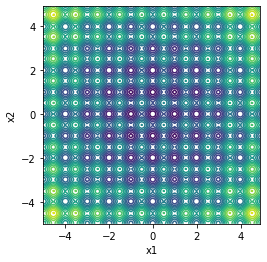

### Fonction n°4

In [5]:
def f4(x):
    X = np.array(x)
    n = len(X)
    res = 0
    for i in range(0,n-1):
        res += 100*(X[i]**2 - X[i+1])**2 + (X[i]-1)**2
    return res

f4 possède, de son côté, une addition. Il faut donc minimiser les deux parties de celle-ci. <br>
A droite, on a $(x_i - 1)^2$, le minimum est donc 0. Ce qui est atteint pour $x_i = 1$.
A gauche, il s'agit également d'un carré et on a 0 lorsque $x_i^2 = x_{i+1}$, hors $1^2 = 1$.
On obtient alors : $\sum_{i=1}^{n-1} 100$ x $(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2 = 0$ si $x_{i} = 1$

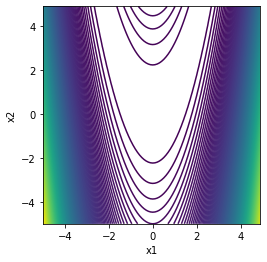

### Algorithme N°1 : Random

Maintenant que nous avons observé le comportement des fonctions, nous allons étudier l'efficacité de certains algorithmes de recherche.

In [6]:
def algo1(f, a, x0, n_iter=2*10**4):
    n = len(x0)
    X = x0
    Xs = np.array([f(X)])
    for i in range(n_iter):
        x = np.random.uniform(low=-a,high=a,size=n)
        if(f(x) <= f(X)):
            X = x
        Xs = np.vstack((Xs, f(X)))
    return X, Xs

Cet algorithme est un algorithme élitiste qui part d'un vecteur X donné $x_0$ de taille n. <br>
Puis, sur n_iter tours de boucle, l'algorithme va créer un nouveau vecteur avec une loi uniforme centrée en 0 et entre -a et a. <br>
Si le résultat de la fonction sur le nouveau vecteur est inférieur à celui du meilleur vecteur des itérations précédente, alors c'est un vecteur améliorant et c'est celui qui est concervé. <br>


In [7]:
import matplotlib.pyplot as plt

On va commencer par tester cet algorithme sur la fonction n°1.

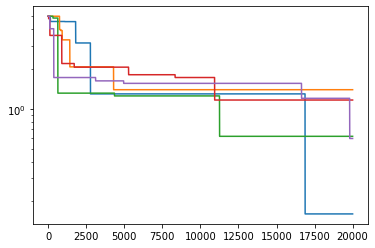

In [8]:
for i in range(5):
    X_f1, Xs_f1 = algo1(f1, 5, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

On observe, ici, qu'il y a une descente aléatoire qui se fait par palier. <br>
On pourrait, théoriquement, obtenir la valeur optimale dès la première itération. <br>
Cependant, le comportement moyen est d'avoir une descente par paliers comme ci-dessus. <br>
On constate que plus le vecteur se rapproche de l'optimal, plus les paliers entre deux changement est long.

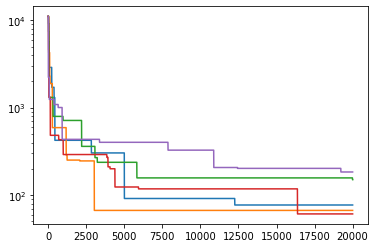

In [31]:
for i in range(5):
    X_f2, Xs_f2 = algo1(f2, 5, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

On remarque que pour la fonction 2, qu'il semble être plus difficile de converger vers 0. <br>
La pondération vient gêner cet algorithme car là où toutes les combinaisons de $x_i$ du vecteur avaient la même valeur, la fonction 2 pondère les $x_i$ et demande donc que la génération aléatoire ait de meilleurs résultats pour les $x_i$ de fin de vecteur.

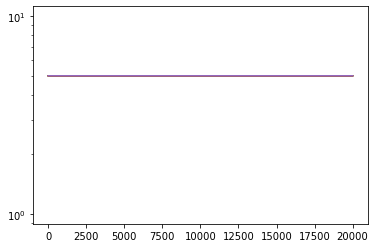

In [49]:
for i in range(5):
    X_f3, Xs_f3 = algo1(f3, 5, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f3)
plt.show()

On peut obtenir : 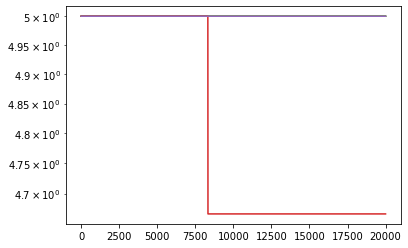 car 5 n'est pas l'optimum.

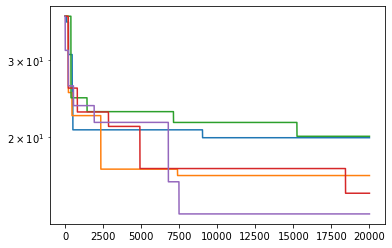

In [35]:
for i in range(5):
    X_f3, Xs_f3 = algo1(f3, 5, np.array([0.8,0.8,0.8,0.8,0.8]))
    plt.semilogy(Xs_f3)
plt.show()

On voit que même si on rapproche le vecteur de début du vecteur nul, le résultat ne se rapproche pas de 0. <br>
Les optimums locaux vont donc nous bloquer sur de longs paliers (pas de place pour l'approximation). <br>
Cette fonction n'est donc absolument pas adaptée à une recherche aléatoire.

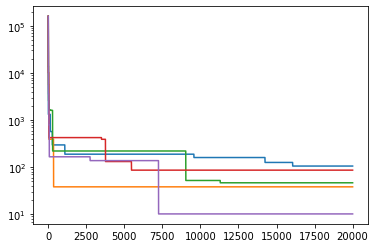

In [55]:
for i in range(5):
    X_f4, Xs_f4 = algo1(f4, 5, np.array([5,5,5,5,5]))
    plt.semilogy(Xs_f4)
plt.show()

On voit sur ce graphique que les premières itérations sont très efficace puis on retombe sur des paliers. <br>
Cependant, on remarque également qu'on se situe très loin de l'optimum. <br>
En effet, comme on avait pu le voir sur le graphique de la fonction, de faibles écart créent tout de même une grande différence à cause de la pondérantion.

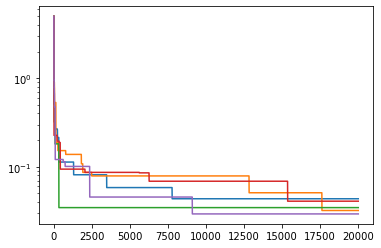

In [57]:
for i in range(5):
    X_f1, Xs_f1 = algo1(f1, 1, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

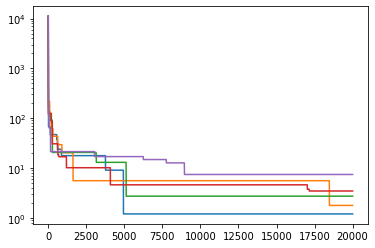

In [59]:
for i in range(5):
    X_f2, Xs_f2 = algo1(f2, 1, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

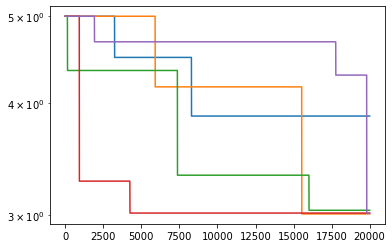

In [58]:
for i in range(5):
    X_f3, Xs_f3 = algo1(f3, 1, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f3)
plt.show()

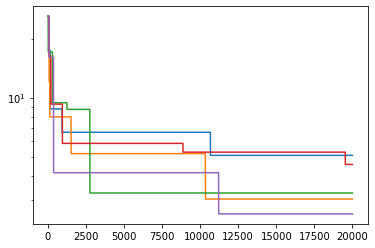

In [61]:
for i in range(5):
    X_f4, Xs_f4 = algo1(f4, 1, np.array([0.5,0.5,0.5,0.5,0.5]))
    plt.semilogy(Xs_f4)
plt.show()

Bien entendu, plus on réduit la loi uniforme, meilleurs sont les résultats. <br>

### Algorithme N°2 : (1 + 1)-ES avec step-size constant

In [63]:
def algo2(f, sigma0, x0, n_iter=2*10**4):
    n = len(x0)
    sigma = sigma0
    X = x0
    Xs = np.array([f(X)])
    for i in range(n_iter):
        x = X + sigma*np.random.normal(0, 1, size=n)
        if(f(x) <= f(X)):
            X = x
        Xs = np.vstack((Xs, f(X)))
    return X, Xs

Cet algorithme est un algorithme élitiste qui est similaire au précédent mais au lieux de créer un vecteur aléatoire à chaque itération, il part du vecteur concervé et lui ajoute $\sigma .N(0,1)$. <br>
On a donc un nouveau vecteur qui dévie du précédent (la force de la déviation dépend de $\sigma$). <br>
On peut donc penser que le vecteur de départ va avoir une bien plus grande importance que pour l'algorithme précédent. <br>
Les nouveaux $x_i$ du vecteur seront contenus dans $[x_i-1\sigma, x_i+1\sigma]$.

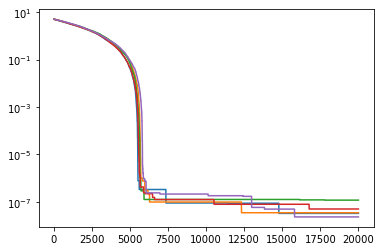

In [64]:
for i in range(5):
    X_f1, Xs_f1 = algo2(f1, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

Pour la fonction 1, il y a 3 phases dans la recherche. <br>
Les 3 phase sont : une première de lente descente car elle fait $\sum x_{i}^2$ comme on cherche à minimiser cette fonctions et que l'on démarre à 1 pour chaque $x_{i}$ on a une première phase de lente baisse du f(x) qui consiste à avoir tous les $x_{i}$ suffisemment inférieur à 1 pour que l'addition du vecteur créé à partir de la loi normale ne fasse plus remonter un des $x_{i}$ au dessus de 1. S'engage alors la seconde phase de baisse rapide du f(x) car plus les valeurs se rapprochent de 0 plus leur carré sera diminuant. Un fois autour de 0, on passe à la phase 3 qui revient à faire appel à un algorithme 1 (aléatoire) de loi normale car seul le vecteur issue de la loi normale et le vecteur concervé seront du même ordre de grandeur.

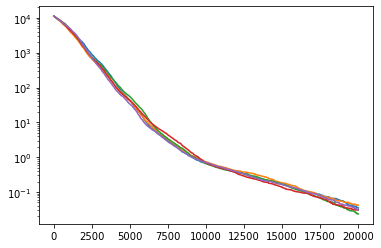

In [65]:
for i in range(5):
    X_f2, Xs_f2 = algo2(f2, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

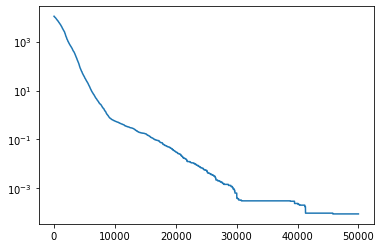

In [66]:
X_f2, Xs_f2 = algo2(f2, 0.001, np.array([1,1,1,1,1]), n_iter=5*10**4)
plt.semilogy(Xs_f2)
plt.show()

La pondération de la fonction 2 rend l'algorithme 2 plus lent que pour la fonction 1 et crée une décélération au lieu d'une accélération. Contrairement à l'algorithme 1, les vecteurs des diffirentes itérations sont proches les uns des autre. C'est pourquoi il y a plus souvent de petites amélioration car il y a 1 chance sur 2 pour un $x_i$ d'être plus petit que le précédent et donc que ceux de poid fort diminuent. Cependant on ne peut donc pas avoir une descente spectaculaire. 

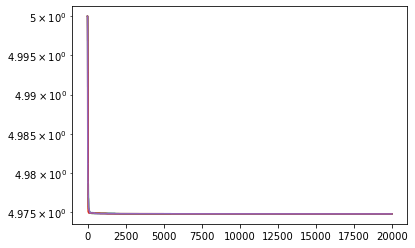

In [67]:
for i in range(5):
    X_f3, Xs_f3 = algo2(f3, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f3)
plt.show()

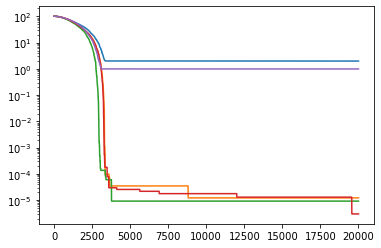

In [68]:
for i in range(5):
    X_f3, Xs_f3 = algo2(f3, 0.001, np.array([0.5,0.5,0.5,0.5,0.5]))
    plt.semilogy(Xs_f3)
plt.show()

On voit très bien que, pour la fonction 3, l'algorithme 2 obtient de bien meilleurs résultats que l'algorithme 1. <br>
Cependant, on voit aussi qu'il est moins fiable que pour les autres fonctions. <br>
En effet, comme on peut le voir, si les conditions sont réunies, l'algorithme peut rester coincé dans des minimums locaux.<br>
Si tel est le cas et si le $\sigma$ est trop petit, il n'y aura plus la possibilité de sortir de ce minimum et peu importe le nombre d'itération, on ne convergera jamais vers le vecteur optimal.

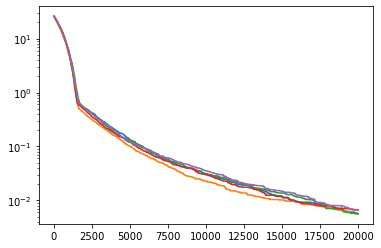

In [75]:
for i in range(5):
    X_f4, Xs_f4 = algo2(f4, 0.001, np.array([0.5,0.5,0.5,0.5,0.5]))
    plt.semilogy(Xs_f4)
plt.show()

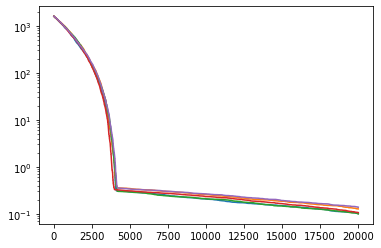

In [82]:
for i in range(5):
    X_f4, Xs_f4 = algo2(f4, 0.001, np.array([2,2,2,2,2]))
    plt.semilogy(Xs_f4)
plt.show()

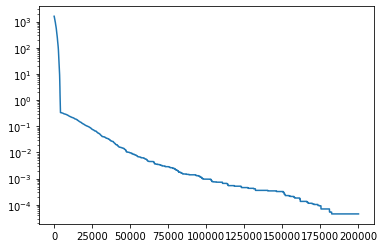

In [80]:
X_f4, Xs_f4 = algo2(f4, 0.001, np.array([2,2,2,2,2]),n_iter = 2*10**5)
plt.semilogy(Xs_f4)
plt.show()

D'après les graphiques, l'agorithme semble agir comme un mélange des fonctions 1 et 2 : phases 1 et 2 de la fonction 1 puis la pente de la fonction 2 avant de passer à la partie aléatoire.

### Algorithme N°3 : (1 + 1)-ES avec step-size adaptatif

In [107]:
def algo3(f, sigma0, x0, n_iter=2*10**4):
    n = len(x0)
    sigma = sigma0
    X = x0
    Xs = np.array([f(X)])
    for i in range(n_iter):
        x = X + sigma*np.random.normal(0, 1, size=n)
        if(f(x) <= f(X)):
            X = x
            sigma = 1.5*sigma
        else:
            sigma = (1.5**(-1/4))*sigma
        Xs = np.vstack((Xs, f(X)))
    return X, Xs

Il s'agit du même algorithme que le précédent sauf pour ce qui est du $\sigma$. <br>
Dans cet algorithme, le choix du $\sigma$ n'importe que peu car celui-ci va se retrouver modifié au fil des itérations. <br>
La stratégie de cet algorithme est donc d'augmenter le $\sigma$ tand que les itérations sont améliorantes pour accélérer la descente et de le réduire quand l'itération est non améliorante pour avoir plus de chance qu'elle le devienne. <br>

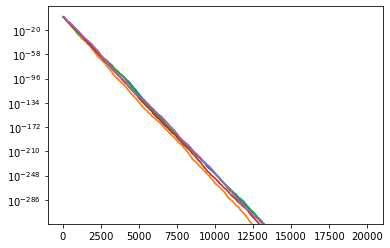

In [121]:
for i in range(5):
    X_f1, Xs_f1 = algo3(f1, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

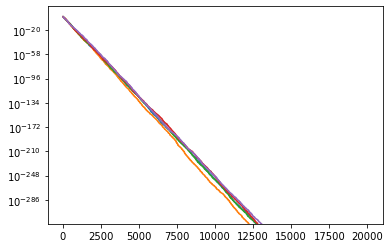

In [122]:
for i in range(5):
    X_f1, Xs_f1 = algo3(f1, 0.1, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

Cette stratégie fonctionne extrêmement bien sur la fonction 1. En offrant une descente linéaire.

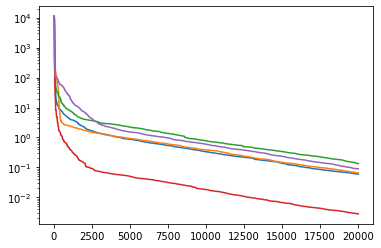

In [123]:
for i in range(5):
    X_f2, Xs_f2 = algo3(f2, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

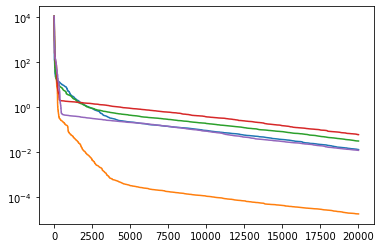

In [124]:
for i in range(5):
    X_f2, Xs_f2 = algo3(f2, 0.1, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

La fonction 2 nous montre bien que cette stratégie peut être à double tranchant car la pondération va rendre plus difficile le fait de trouver un vecteur améliorant non pas à cause de la taille de $\sigma .N(0,1)$ mais de l'agencement des éléments du vecteur. <br>
L'algorithme va donc fortement ralentir alors qu'il ne devrait pas encore le faire.

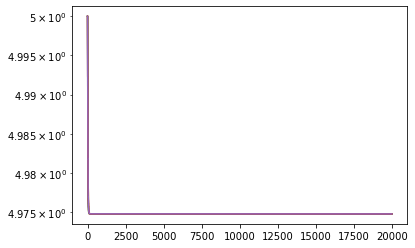

In [125]:
for i in range(5):
    X_f3, Xs_f3 = algo3(f3, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f3)
plt.show()

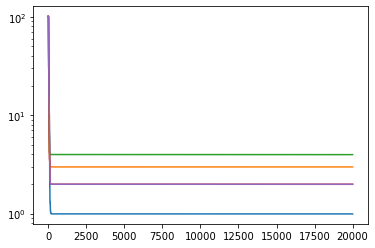

In [126]:
for i in range(5):
    X_f3, Xs_f3 = algo3(f3, 0.001, np.array([0.5,0.5,0.5,0.5,0.5]))
    plt.semilogy(Xs_f3)
plt.show()

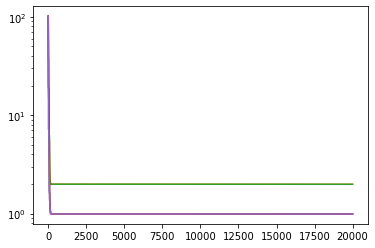

In [127]:
for i in range(5):
    X_f3, Xs_f3 = algo3(f3, 0.1, np.array([0.5,0.5,0.5,0.5,0.5]))
    plt.semilogy(Xs_f3)
plt.show()

Si la fonction 2 nous avait montré que la stratégie était à double tranchant pour le temps de recherche, il en va de même pour la fonctions 3 et les minimas locaux. <br>
On voit bien, ici, qu'à la moindre occasion, l'algorithme se retrouve bloqué dans un minima local pour ne jamais plus en sortir puisque la baisse de $\sigma$ va réduire $\sigma .N(0,1)$ au vecteur nul.

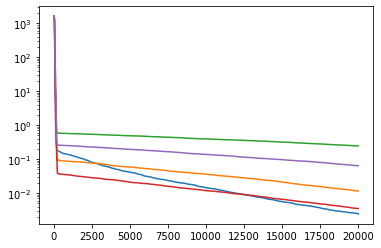

In [120]:
for i in range(5):
    X_f4, Xs_f4 = algo3(f4, 0.001, np.array([2,2,2,2,2]))
    plt.semilogy(Xs_f4)
plt.show()

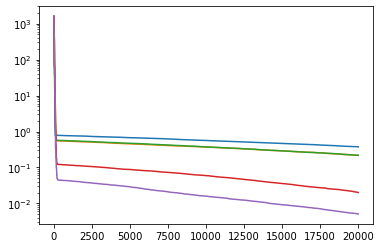

In [130]:
for i in range(5):
    X_f4, Xs_f4 = algo3(f4, 0.1, np.array([2,2,2,2,2]))
    plt.semilogy(Xs_f4)
plt.show()

### Algorithme N°4 : ($\mu /\mu$, $\lambda$)-ES

In [9]:
def algo4(f, mu, lmbda, sigma0, x0, n_iter=2*10**4):
    assert(len(mu)<=lmbda)
    n = len(x0)
    sigma = sigma0
    X = x0
    Xs = np.array([f(X)])
    for i in range(n_iter):
        x = sigma*np.random.normal(0, 1, size=(lmbda,n))
        x = x + X
        x = x.tolist()
        x.sort(key=f)
        x = np.array(x)
        X = np.sum(mu.reshape(len(mu),1)*x[:len(mu)],axis=0)
        Xs = np.vstack((Xs, f(X)))
    return X, Xs

Contrairement aux 3 autres, cet algorithme n'est pas élitiste : on ne choisis pas un vecteur améliorant mais le vecteur obtenu. <br>
Le débuit de cet algorithme est comme le (1+1)-ES mais au lieu de créer 1 seul nouveau vecteur, on en crée $\lambda$. <br>
Ces vecteurs vont ensuite être classés du meilleur au moins bon (minimisation de la fonction). <br>
Ensuite, on utilise le vecteur $\mu$. Ce vecteur a pour but de récupérer les $len(\mu)$ meilleurs vecteur, de leur attribuer un poid et finalement créer un vecteur qui est la moyenne pondérée de ces derniers.

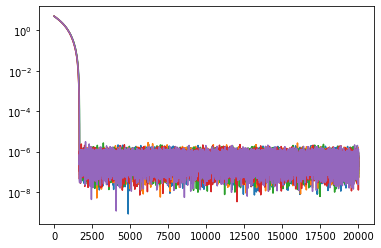

In [19]:
for i in range(5):
    X_f1, Xs_f1 = algo4(f1,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

In [39]:
def algo4_1(f, mu, lmbda, sigma0, x0, n_iter=2*10**4):
    assert(len(mu)<=lmbda)
    n = len(x0)
    sigma = sigma0
    X = x0
    Xs = np.array([f(X)])
    for i in range(n_iter):
        x = sigma*np.random.normal(0, 1, size=(lmbda,n))
        x = x + X
        x = x.tolist()
        x.sort(key=f)
        x = np.array(x)
        m = np.sum(mu.reshape(len(mu),1)*x[:len(mu)],axis=0)
        if f(m) > f(X):
            sigma = 0.8*sigma
        else:
            sigma = 1.1*sigma
        X = m
        Xs = np.vstack((Xs, f(X)))
    return X, Xs

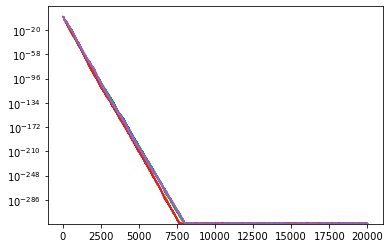

In [40]:
for i in range(5):
    X_f1, Xs_f1 = algo4_1(f1,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

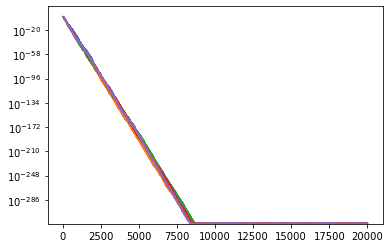

In [42]:
for i in range(5):
    X_f1, Xs_f1 = algo4_1(f1,np.array([0.3,0.25,0.2,0.15,0.1]), 10, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

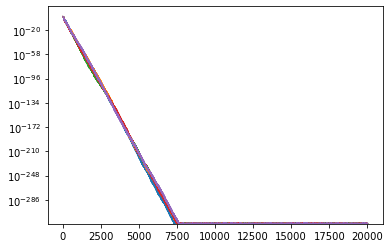

In [44]:
for i in range(5):
    X_f1, Xs_f1 = algo4_1(f1,np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]), 100, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

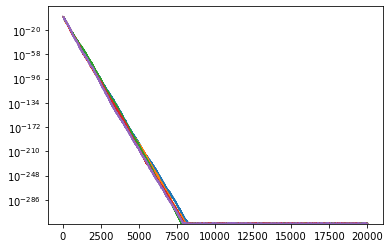

In [46]:
for i in range(5):
    X_f1, Xs_f1 = algo4_1(f1,np.array([0.2,0.18,0.16,0.14,0.12,0.1,0.06,0.04]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f1)
plt.show()

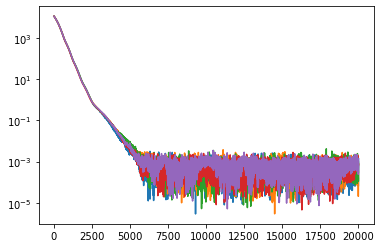

In [17]:
for i in range(5):
    X_f2, Xs_f2 = algo4(f2,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

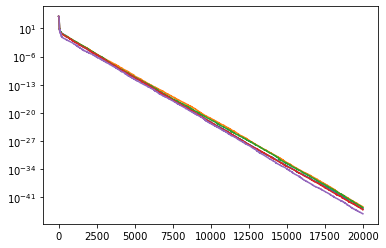

In [48]:
for i in range(5):
    X_f2, Xs_f2 = algo4_1(f2,np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]), 100, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

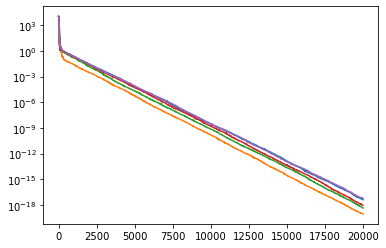

In [41]:
for i in range(5):
    X_f2, Xs_f2 = algo4_1(f2,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f2)
plt.show()

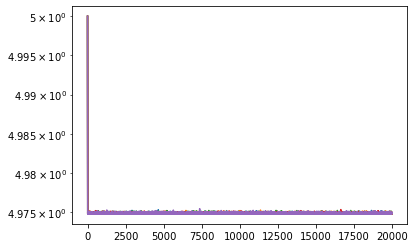

In [14]:
for i in range(5):
    X_f3, Xs_f3 = algo4(f3,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f3)
plt.show()

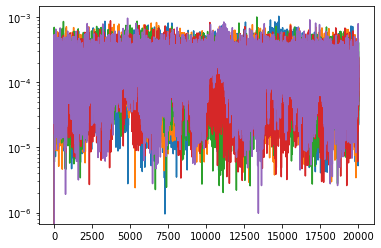

In [15]:
for i in range(5):
    X_f4, Xs_f4 = algo4(f4,np.array([0.3,0.25,0.2,0.15,0.1]), 20, 0.001, np.array([1,1,1,1,1]))
    plt.semilogy(Xs_f4)
plt.show()